In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set default visualization style
sns.set_style("whitegrid")

2. Data Loading and Initial Inspection
We load the data from the provided CSV file. Since we are simulating a standard environment, the raw CSV data is included here for reproducibility. We then use .head() and .info() to quickly assess the data types, non-null counts, and initial rows.

In [6]:
df = pd.read_excel('student_grades_dataset_200.xlsx')
df
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Student ID    200 non-null    object
 1   Name          200 non-null    object
 2   Subject       200 non-null    object
 3   Marks         200 non-null    int64 
 4   Grade         200 non-null    object
 5   Attendance %  200 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


,Student ID,Name,Subject,Marks,Grade,Attendance %
195,S018,Grace,History,69,C,98
196,S004,Laura,Science,87,A,93
197,S050,Paul,Geography,36,D,78
198,S013,Noah,History,94,A,58
199,S025,Quinn,English,78,B,70


In [7]:
df.tail()

,Student ID,Name,Subject,Marks,Grade,Attendance %
195,S018,Grace,History,69,C,98
196,S004,Laura,Science,87,A,93
197,S050,Paul,Geography,36,D,78
198,S013,Noah,History,94,A,58
199,S025,Quinn,English,78,B,70


3. Exploratory Data Analysis (EDA) - Distributions
We use visualizations to understand the spread and balance of our features:

Marks & Attendance: Checking if numerical features are normally distributed.

Subject & Grade: Checking for any class imbalance in the categorical features (which could bias the model).

C:\Users\adhit\AppData\Local\Temp\ipykernel_6352\4266160850.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Subject'], palette='viridis')
C:\Users\adhit\AppData\Local\Temp\ipykernel_6352\4266160850.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Grade'], order=['A', 'B', 'C', 'D'], palette='cividis')


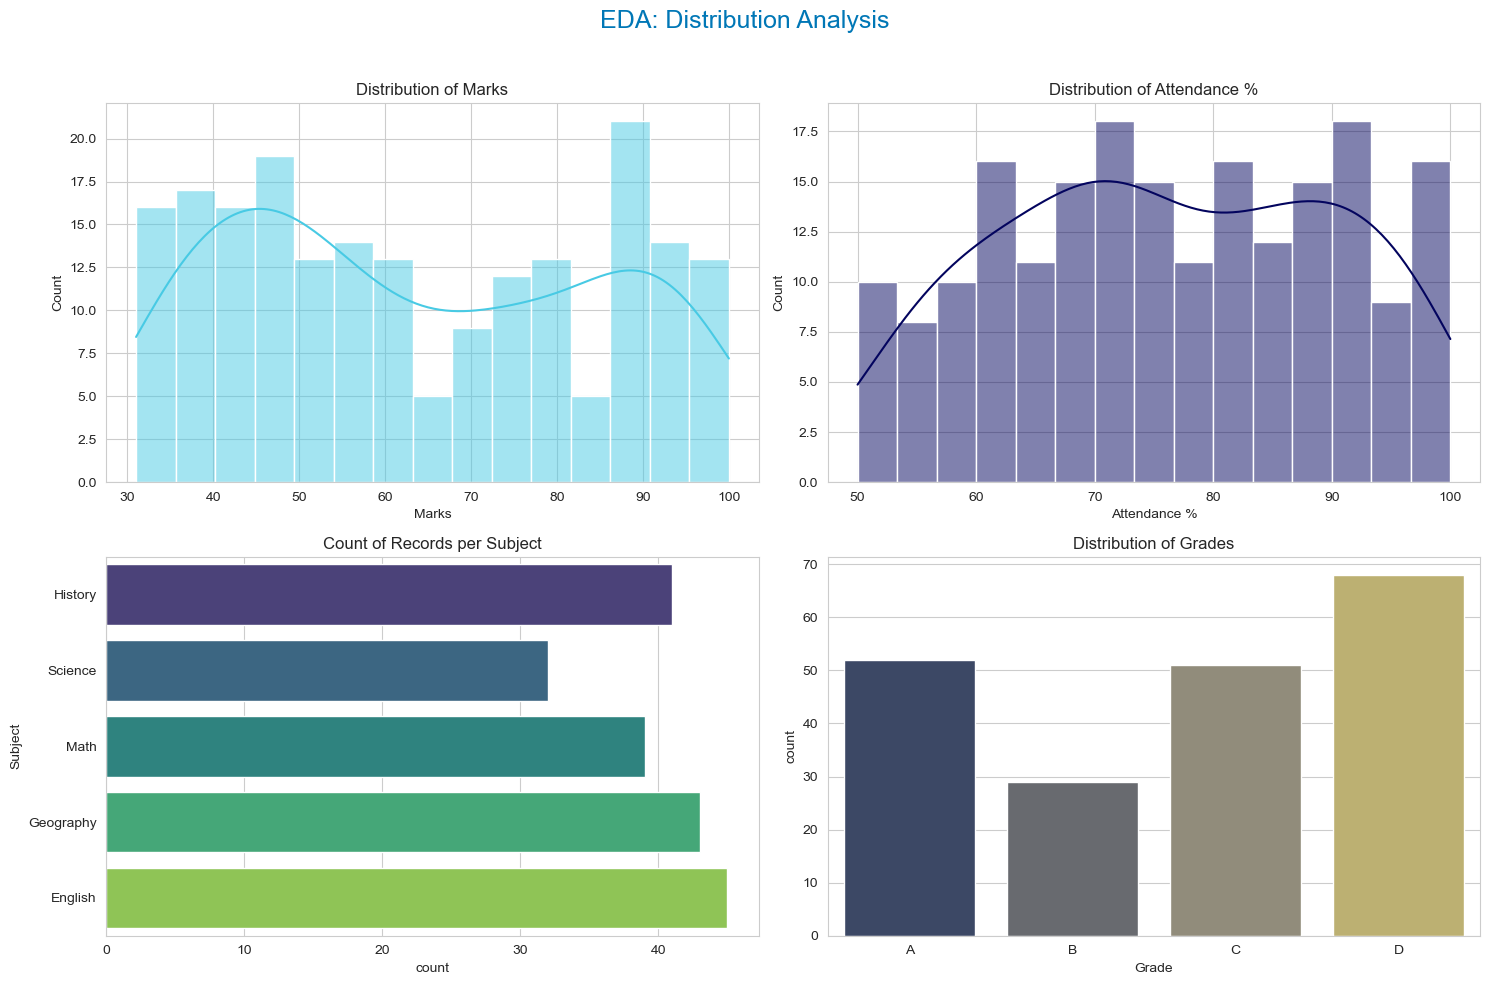

In [4]:
plt.figure(figsize=(15, 10))
plt.suptitle("EDA: Distribution Analysis", fontsize=18, color='#0077b6')

# 1. Marks Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Marks'], kde=True, bins=15, color='#48cae4')
plt.title('Distribution of Marks')

# 2. Attendance % Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Attendance %'], kde=True, bins=15, color='#03045e')
plt.title('Distribution of Attendance %')

# 3. Subject Counts
plt.subplot(2, 2, 3)
sns.countplot(y=df['Subject'], palette='viridis')
plt.title('Count of Records per Subject')

# 4. Grade Counts (Target Variable)
plt.subplot(2, 2, 4)
sns.countplot(x=df['Grade'], order=['A', 'B', 'C', 'D'], palette='cividis')
plt.title('Distribution of Grades')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

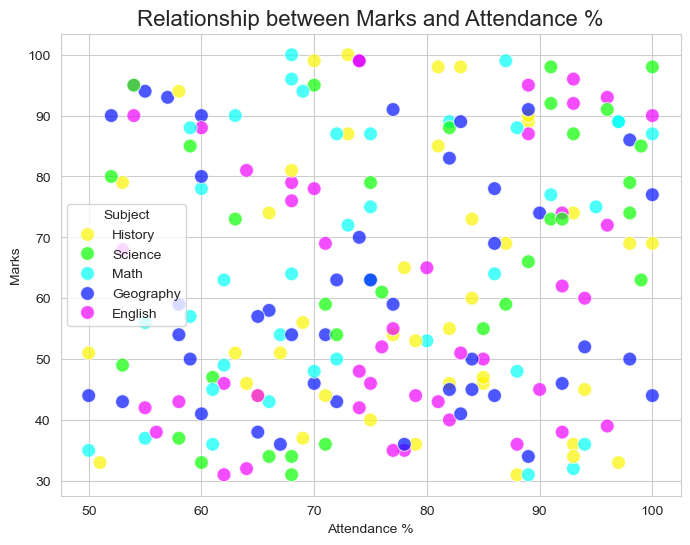

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance %', y='Marks', hue='Subject', data=df, palette='hsv', s=100, alpha=0.7)
plt.title('Relationship between Marks and Attendance %', fontsize=16)
plt.show()

5. Preprocessing: Cleaning and Ordinal Encoding
This step cleans the data and prepares categorical features:

Drop Irrelevant IDs: Student ID and Name are dropped as they are identifiers and not predictive features.

Ordinal Encoding: The Grade column (A, B, C, D) is ordinal (ordered). We map it to numerical values (4, 3, 2, 1) to teach the model the inherent ranking.

In [8]:
# 1. Drop irrelevant columns
df_processed = df.drop(columns=['Student ID', 'Name'])

# 2. Ordinal Encoding for 'Grade'
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
df_processed['Grade_Encoded'] = df_processed['Grade'].apply(lambda x: grade_mapping.get(x, 0))
df_processed = df_processed.drop(columns=['Grade'])

print("Data after dropping IDs and Ordinal Encoding 'Grade':")
print(df_processed.head())

Data after dropping IDs and Ordinal Encoding 'Grade':
     Subject  Marks  Attendance %  Grade_Encoded
0    History     40            75              1
1    Science     61            76              2
2    Science     31            68              1
3       Math     77            91              3
4  Geography     46            70              1


In [9]:
# One-Hot Encoding for 'Subject'
df_processed = pd.get_dummies(df_processed, columns=['Subject'], drop_first=True, prefix='Subject')

print("Data after One-Hot Encoding 'Subject':")
print(df_processed.head())
print("\nFinal columns:", df_processed.columns.tolist())

Data after One-Hot Encoding 'Subject':
   Marks  Attendance %  Grade_Encoded  Subject_Geography  Subject_History  \
0     40            75              1              False             True   
1     61            76              2              False            False   
2     31            68              1              False            False   
3     77            91              3              False            False   
4     46            70              1               True            False   

   Subject_Math  Subject_Science  
0         False            False  
1         False             True  
2         False             True  
3          True            False  
4         False            False  

Final columns: ['Marks', 'Attendance %', 'Grade_Encoded', 'Subject_Geography', 'Subject_History', 'Subject_Math', 'Subject_Science']


In [10]:
numerical_features = ['Marks', 'Attendance %']
scaler = StandardScaler()

# Fit and Transform the numerical features
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

print("Data after Feature Scaling (Standardization):")
print(df_processed.head())
print("\nScaled Marks mean:", df_processed['Marks'].mean())
print("Scaled Attendance std:", df_processed['Attendance %'].std())

Data after Feature Scaling (Standardization):
      Marks  Attendance %  Grade_Encoded  Subject_Geography  Subject_History  \
0 -1.102989     -0.092541              1              False             True   
1 -0.116290     -0.020804              2              False            False   
2 -1.525860     -0.594703              1              False            False   
3  0.635481      1.055258              3              False            False   
4 -0.821075     -0.451228              1               True            False   

   Subject_Math  Subject_Science  
0         False            False  
1         False             True  
2         False             True  
3          True            False  
4         False            False  

Scaled Marks mean: -7.105427357601002e-17
Scaled Attendance std: 1.002509414234171


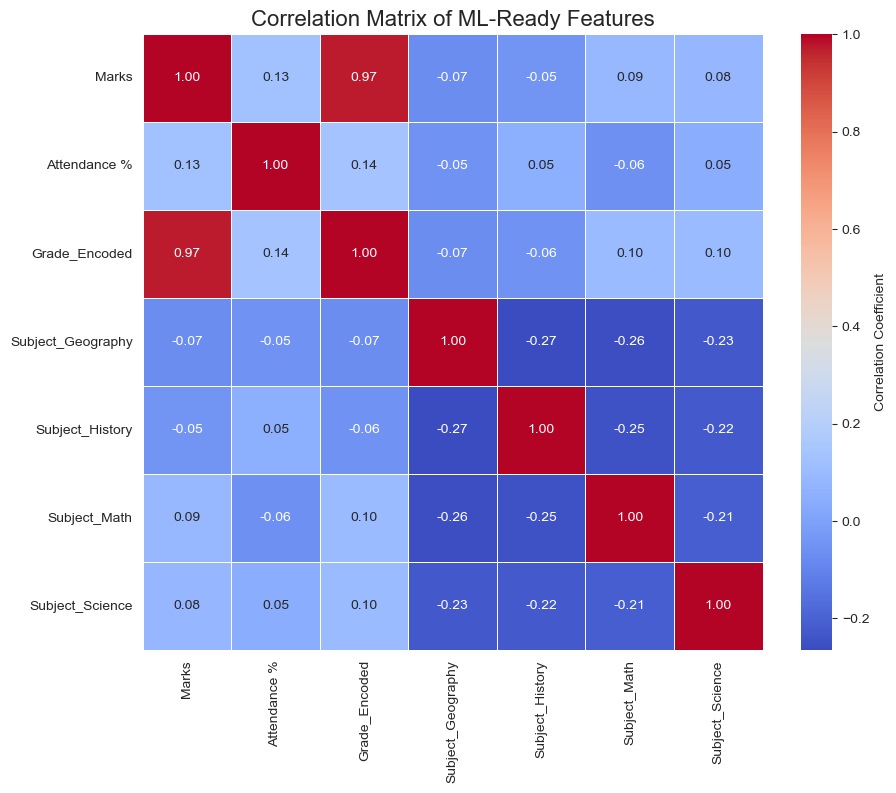


The dataset (df_processed) is now fully prepared for splitting into training/testing sets and model training!


In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_processed.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of ML-Ready Features', fontsize=16)
plt.show()

print("\nThe dataset (df_processed) is now fully prepared for splitting into training/testing sets and model training!")